# Week-1

# Linear Regression Example using tensorflow
Linear regression implementation with TensorFlow v2 library.

This example is using a low-level approach to better understand all mechanics behind the training process.


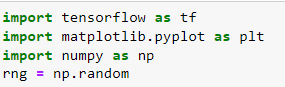

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
rng = np.random

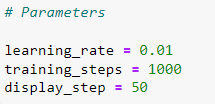

In [2]:
learning_rate = 0.01
training_steps = 1000
display_step = 50

#### Just run the next cell using 'Ctrl' + 'Enter'

In [3]:
# Training Data.

X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])

Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])

n_samples = X.shape[0]

In [4]:
print(X, '\n', X.shape)

[ 3.3    4.4    5.5    6.71   6.93   4.168  9.779  6.182  7.59   2.167
  7.042 10.791  5.313  7.997  5.654  9.27   3.1  ] 
 (17,)


In [5]:
print(Y, '\n', Y.shape)

[1.7   2.76  2.09  3.19  1.694 1.573 3.366 2.596 2.53  1.221 2.827 3.465
 1.65  2.904 2.42  2.94  1.3  ] 
 (17,)


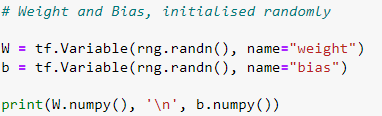

In [6]:
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

print(W.numpy(), '\n', b.numpy())

0.8613436 
 -0.88612056


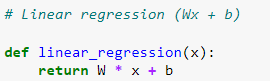

In [7]:
#Linear regression (Wx + b)

def linear_regression(x):
    return W * x + b

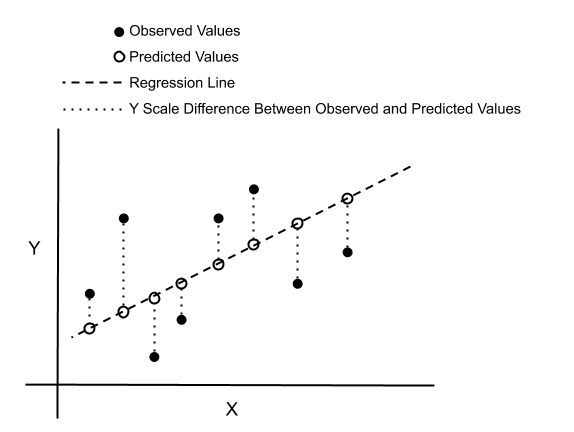

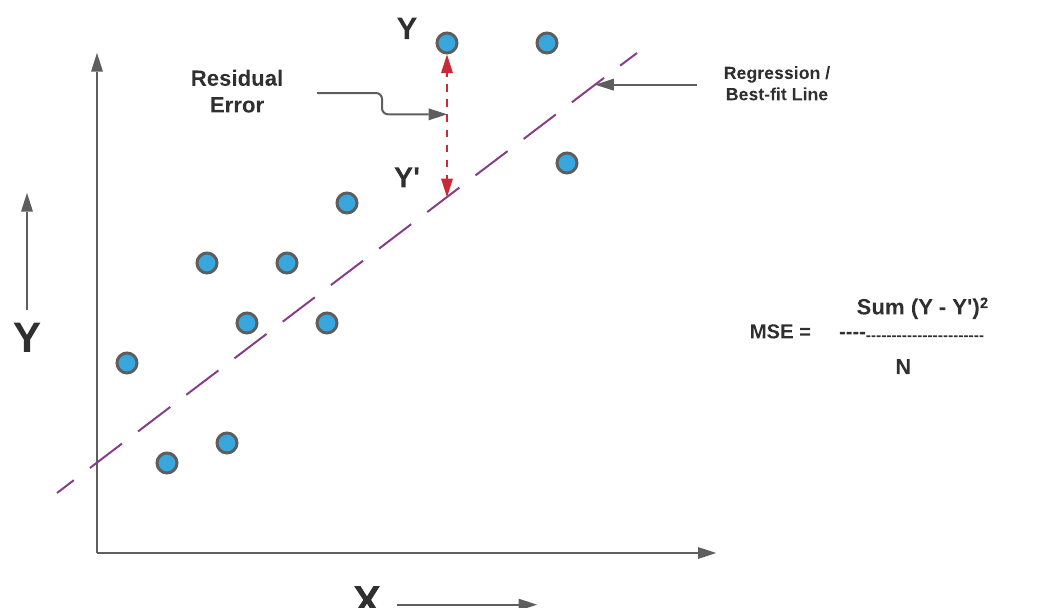

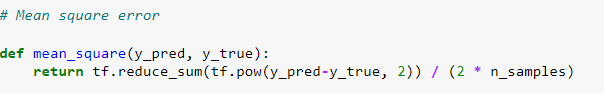

In [8]:
def mean_square(y_pred, y_true):
    return tf.reduce_sum(tf.pow(y_pred-y_true, 2)) / (2 * n_samples)

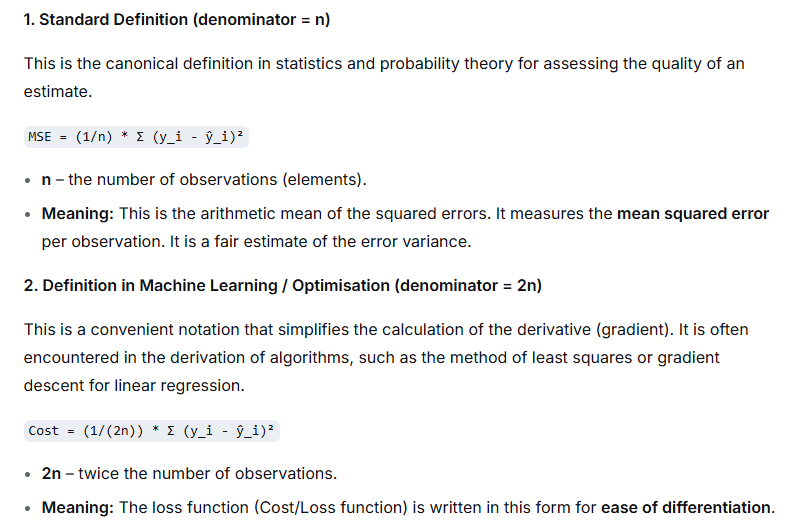

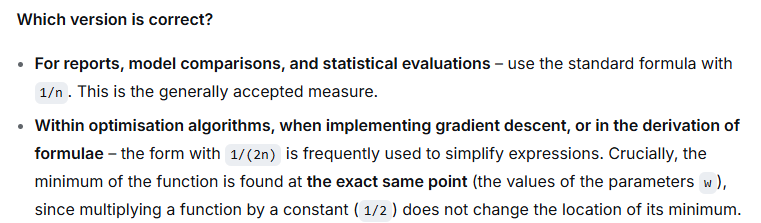

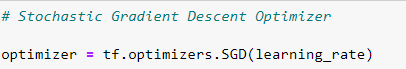

In [9]:
optimizer = tf.optimizers.SGD(learning_rate)

In [10]:
# Adding a question mark () after the function name lets you view the latest documentation. 
# This is a handy tool.

In [11]:
tf.optimizers.SGD?

Init signature:
tf.optimizers.SGD(
    learning_rate=0.01,
    momentum=0.0,
    nesterov=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    loss_scale_factor=None,
    gradient_accumulation_steps=None,
    name='SGD',
    **kwargs,
)
Docstring:     
Gradient descent (with momentum) optimizer.

Update rule for parameter `w` with gradient `g` when `momentum` is 0:

```python
w = w - learning_rate * g
```

Update rule when `momentum` is larger than 0:

```python
velocity = momentum * velocity - learning_rate * g
w = w + velocity
```

When `nesterov=True`, this rule becomes:

```python
velocity = momentum * velocity - learning_rate * g
w = w + momentum * velocity - learning_rate * g
```

Args:
    learning_rate: A float, a
        `keras.optimizers.schedules.LearningRateSchedule` instance, or
        a callable that takes no arguments and returns the actual value to


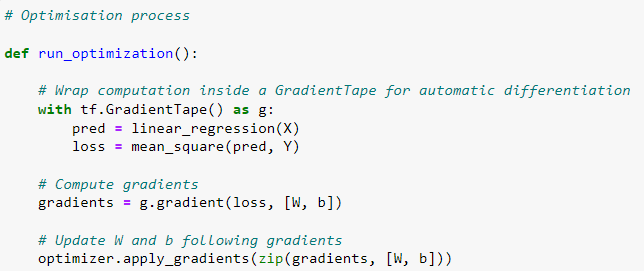

In [12]:
def run_optimization():

    # Wrap camputation inside a gradienttape for automatic differentiation
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
    # compute gradients

    gradients = g.gradient(loss, [W,b])

    #update W and b following gradients
    optimizer.apply_gradients(zip(gradients, [W,b]))


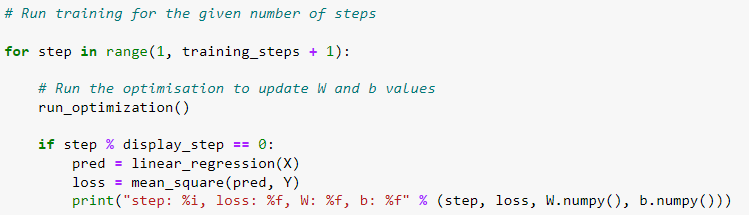

In [13]:
for step in range(1, training_steps + 1):

    # Run the optimisation to update W and b values
    run_optimization()

    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 50, loss: 0.242210, W: 0.482124, b: -0.835266
step: 100, loss: 0.223307, W: 0.468544, b: -0.738984
step: 150, loss: 0.206565, W: 0.455763, b: -0.648376
step: 200, loss: 0.191739, W: 0.443736, b: -0.563107
step: 250, loss: 0.178608, W: 0.432417, b: -0.482862
step: 300, loss: 0.166979, W: 0.421765, b: -0.407345
step: 350, loss: 0.156680, W: 0.411741, b: -0.336278
step: 400, loss: 0.147559, W: 0.402307, b: -0.269398
step: 450, loss: 0.139481, W: 0.393429, b: -0.206458
step: 500, loss: 0.132327, W: 0.385075, b: -0.147227
step: 550, loss: 0.125991, W: 0.377212, b: -0.091486
step: 600, loss: 0.120379, W: 0.369813, b: -0.039029
step: 650, loss: 0.115410, W: 0.362850, b: 0.010337
step: 700, loss: 0.111009, W: 0.356297, b: 0.056794
step: 750, loss: 0.107111, W: 0.350130, b: 0.100514
step: 800, loss: 0.103659, W: 0.344327, b: 0.141658
step: 850, loss: 0.100602, W: 0.338865, b: 0.180377
step: 900, loss: 0.097894, W: 0.333726, b: 0.216815
step: 950, loss: 0.095497, W: 0.328889, b: 0.251107
s

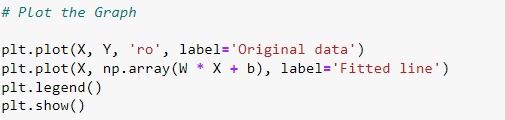

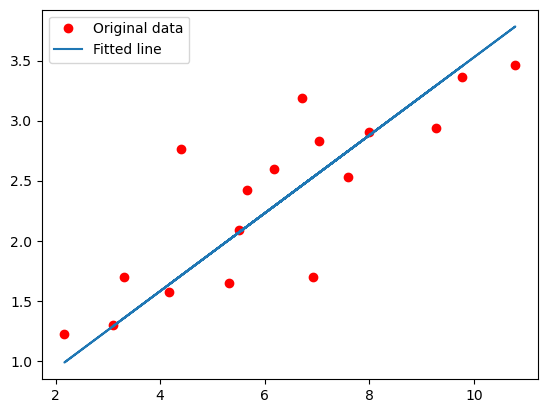

In [14]:
plt.plot(X, Y, 'ro', label = 'Original data')
plt.plot(X, np.array(W * X + b), label = 'Fitted line')
plt.legend()
plt.show()

# Lab Logbook requirements: 
### Please make sure to document the following in your Lablogbook:

Include an image of the generated graph depicting the original data and the fitted line for linear regression. Modify the appearance of the graph by adjusting its color or size, making it different from the graph of your classmates. Copy the figure and paste it directly into your logbook. Refrain from taking a snapshot; instead, right-click and copy the graph to your lab logbook. Ensure that no code or other information is added to the logbook and that only required graph is present.  

#### Marks will not be awarded if anything else is found in the logbook or instructions are not clearly followed.

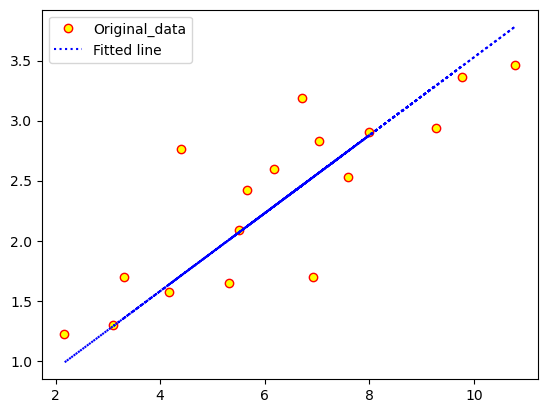

In [18]:
plt.plot(X, Y, marker='o', markersize=6, markeredgecolor='red', markerfacecolor='yellow',linestyle = 'none',
         label = 'Original_data')
plt.plot(X, np.array(W*X+b), color='blue', linestyle='dotted', label='Fitted line')

plt.legend()
plt.show()